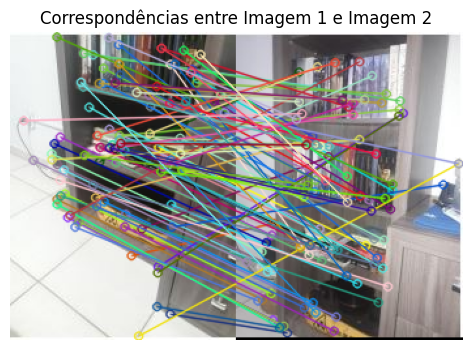

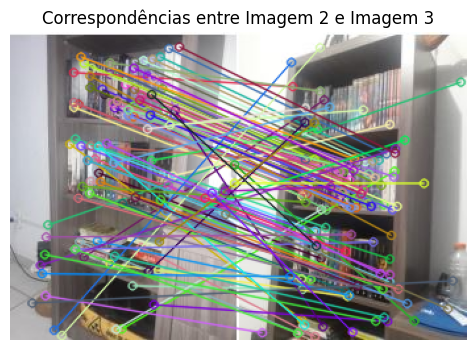

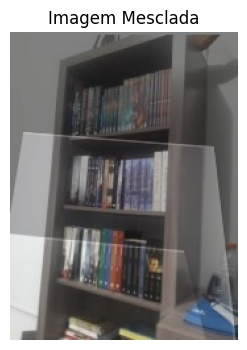

In [15]:
"""
Alunos: Luan L. Guarnieri, Maria E. Krutzsch
"""
import cv2
import numpy as np
import matplotlib.pyplot as plt

def carregar_e_converter_para_cinza(caminho_imagem):
    imagem = cv2.imread(caminho_imagem)
    cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
    return imagem, cinza

def detectar_pontos_chave_e_descritores(imagem):
    sift = cv2.SIFT_create()
    pontos_chave, descritores = sift.detectAndCompute(imagem, None)
    return pontos_chave, descritores

def corresponder_pontos_chave(descritores1, descritores2):
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    correspondencias = bf.match(descritores1, descritores2)
    return sorted(correspondencias, key=lambda x: x.distance)

def desenhar_correspondencias(imagem1, pontos_chave1, imagem2, pontos_chave2, correspondencias):
    correspondencias_desenhadas = cv2.drawMatches(imagem1, pontos_chave1, imagem2, pontos_chave2, correspondencias, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    return correspondencias_desenhadas

def warp_imagens(img1, img2, pontos_chave1, pontos_chave2, correspondencias):
    pontos1 = np.float32([pontos_chave1[corresp.queryIdx].pt for corresp in correspondencias]).reshape(-1, 1, 2)
    pontos2 = np.float32([pontos_chave2[corresp.trainIdx].pt for corresp in correspondencias]).reshape(-1, 1, 2)
    h, _ = cv2.findHomography(pontos1, pontos2, cv2.RANSAC)
    altura, largura = img2.shape[:2]
    img1_alinhada = cv2.warpPerspective(img1, h, (largura, altura))
    return img1_alinhada

def mesclar_imagens(img1_alinhada, img2, img3):
    resultado = cv2.addWeighted(img1_alinhada, 0.5, img2, 0.5, 0)
    altura, largura = img3.shape[:2]
    img2_alinhada = cv2.warpPerspective(resultado, h2, (largura, altura))
    img3_redimensionada = cv2.resize(img3, (largura, altura))
    resultado_final = cv2.addWeighted(img2_alinhada, 0.5, img3_redimensionada, 0.5, 0)
    return resultado_final

def mostrar_imagem(imagem, titulo):
  plt.figure(figsize=(8, 4))
  plt.title(titulo)
  plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.show()

# Carregar e converter imagens para escala de cinza
img1, cinza1 = carregar_e_converter_para_cinza('img1.jpg')
img2, cinza2 = carregar_e_converter_para_cinza('img2.jpg')
img3, cinza3 = carregar_e_converter_para_cinza('img3.jpg')

# Detectar pontos chave e computar descritores
pontos_chave1, descritores1 = detectar_pontos_chave_e_descritores(cinza1)
pontos_chave2, descritores2 = detectar_pontos_chave_e_descritores(cinza2)
pontos_chave3, descritores3 = detectar_pontos_chave_e_descritores(cinza3)

# Encontrar correspondências
correspondencias1_2 = corresponder_pontos_chave(descritores1, descritores2)
correspondencias2_3 = corresponder_pontos_chave(descritores2, descritores3)

# Desenhar correspondências
correspondencias_desenhadas1_2 = desenhar_correspondencias(img1, pontos_chave1, img2, pontos_chave2, correspondencias1_2)
correspondencias_desenhadas2_3 = desenhar_correspondencias(img2, pontos_chave2, img3, pontos_chave3, correspondencias2_3)

# Plota as correspondências
mostrar_imagem(correspondencias_desenhadas1_2, 'Correspondências entre Imagem 1 e Imagem 2')
mostrar_imagem(correspondencias_desenhadas2_3, 'Correspondências entre Imagem 2 e Imagem 3')

# Warpar e mesclar as imagens
img1_alinhada = warp_imagens(img1, img2, pontos_chave1, pontos_chave2, correspondencias1_2)
resultado_final = mesclar_imagens(img1_alinhada, img2, img3)

# Mostrar a imagem resultante
mostrar_imagem(resultado_final, 'Imagem Mesclada')
